### Import Libraries

In [370]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Load Dataset

In [371]:
# Load csv
df = pd.read_csv("data/loan.csv")

/tmp/ipykernel_64598/1250389818.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan.csv")


In [372]:
df.shape

(39717, 111)

### Data Understanding and Cleaning

##### Fix rows and columns

We found out that there are many columns where no data is present in any row, so we decide to remove those columns, e.g: num_tl_90g_dpd_24m, total_bal_ex_mort, etc 

In [373]:
# List of all columns where values are filled with only None
df.columns[df.isnull().sum()==df.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [374]:
# Removing where all are filled with None
df.dropna(inplace=True, axis=1, how="all")

After initially dropping columns which are filled with None value, we also saw some column where are rows contain same value. e.g: pymnt_plan contains only n, initial_list_status contains only f, etc. So we decided to remove those columns as well.

In [375]:
# List of all columns where all rows contain same value
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [376]:
# Removing where nunique is 1
df = df[[i for i in df if df[i].nunique()>1]]

Understanding remaining columns, so we decided to bifurcate each columns based opn dtype

In [377]:
object_columns = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(exclude=['object'])


In [378]:
for i in object_columns.columns:
    print("columns: {}".format(i))
    print(df[i].value_counts())
    print("\n")
    print("\n")

columns: term
 36 months    29096
 60 months    10621
Name: term, dtype: int64




columns: int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64




columns: grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64




columns: sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64




columns: emp_title
US Army                              134
Bank of America                      109
IBM                                   

In [379]:
for i in numerical_columns.columns:
    print("columns: {}".format(i))
    print(df[i].value_counts())
    print("\n")
    print("\n")

columns: id
1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64




columns: member_id
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64




columns: loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64




columns: funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64




columns: funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                .

Figuring out irrelevent columns

These are the columns which don't help in finding loan defaulting.

For object columns:
- last_credit_pull_d: not required, as this is the date when LC checks the credit score for the member
- emp_title: not required, as this state the employer of the loanee
- url: not required, as this contain the LC loan url page
- desc: not required, as this is provided by loanee for loan
- title: not required, as this is provided by loanee for loan title
- zip_code: not required as this dont required for figuring out loan defaulting
- addr_state: not required, same as zip_code
- last_pymnt_d: not required

For numerical columns:
- id and member_id: not required as not helping in loan defaulting
- mths_since_last_delinq: not required as not many values are present
- mths_since_last_record: not required same as mths_since_last_delinq
- out_prncp and out_prncp_inv: not required as loanee still can pay 
- total_pymnt and total_pymnt_inv: not required as this can't help in determine loan defaulting
- total_rec_prncp: not required, won't help in loan defaulting
- total_rec_int: not required, won't help in loan defaulting
- total_rec_late_fee: not required, won't help in loan defaulting
- recoveries: not required, as this is charge which is going to be useful after all recovery
- collection_recovery_fee: not required, won't help in loan defaulting
- last_pymnt_amnt: not required, won't help in loan defaulting
- pub_rec_bankruptcies: not required, more than 99% have same value

In [380]:
object_irrelevant_columns = ['last_pymnt_d', 'last_credit_pull_d', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state']
numerical_irrelevant_columns = ['id', 'member_id', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

In [381]:
irrelevant_columns = object_irrelevant_columns + numerical_irrelevant_columns

In [382]:
# dropping irrevelant columns
df.drop(columns=irrelevant_columns, inplace=True, axis=1)

In [383]:
# Remaining columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'next_pymnt_d'],
      dtype='object')

##### Fix Missing Values

In [384]:
# List number of missing values in each columns
df.isna().sum()* 100 / len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
next_pymnt_d           97.129693
dtype: float64

next_pymnt_d can be removed as it contain more None values

In [385]:
df.drop(columns=["next_pymnt_d"], inplace=True, axis=1)

emp_length contains 2.7% which can be removed

In [386]:
df.dropna(subset=["emp_length"], inplace=True, axis=0)

revol_util contains .17% which can be removed

In [387]:
df.dropna(subset=["revol_util"], inplace=True, axis=0)

##### Standardising Values

int_rate is an object but it should be numerical value, so we are converting it from "14%" to 14.0

In [388]:
df["int_rate"] = df.int_rate.apply(lambda x: float(x.replace("%", "")))

same as int_rate, we are updating revol_util

In [389]:
df["revol_util"] = df.revol_util.apply(lambda x: float(x.replace("%", "")))

emp_length should be a numerical value, so we are updating "< 1 year" as 0 and "10+ years" as 10

In [390]:
def remove_years(s):
    return s.replace("years", "").replace("year", "")

In [391]:
df["emp_length"] = df.emp_length.apply(lambda x: 0 if "<" in remove_years(x) else 10 if "+" in remove_years(x) else int(remove_years(x)))

Standardise date values

We see that there are None value in home_ownership, which according to data dictionary is incorrect, we'll drop those rows are there are only less thta 1%.

In [392]:
df = df[df.home_ownership != "NONE"]

In [393]:
df.rename(columns = {'earliest_cr_line':'earliest_cr_line_d'}, inplace = True)
date_columns = [i for i in df.columns if i[-2:] == "_d"]

Fetch month and year from date

In [394]:
for i in date_columns:
    df[i] = df[i].apply(lambda x: datetime.strptime(x, '%b-%y'))
    df["{}_month".format(i)] = df[i].apply(lambda x: x.month)
    df["{}_year".format(i)] = df[i].apply(lambda x: x.year)

# Dropping date columns as these are changed into month and year
df.drop(columns=date_columns, inplace=True, axis=1)

##### Filtering Data

We cannont use loan status current for loan defaulting as it is still going on.

In [395]:
# filtering out current rows
df = df[df.loan_status != "Current"]
df.loan_status.value_counts()

Fully Paid     32110
Charged Off     5384
Name: loan_status, dtype: int64

Before continuing, lets define the categorical and continuous data

In [396]:
categorical_columns = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "issue_d_month", "issue_d_year", "earliest_cr_line_d_month", "earliest_cr_line_d_year"]
continuous_columns = ["loan_amnt", "funded_amnt", "founded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "revol_bal", "revol_util", "total_acc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec"]

### Univariate Analysis

Remaining columns

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37494 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 37494 non-null  int64  
 1   funded_amnt               37494 non-null  int64  
 2   funded_amnt_inv           37494 non-null  float64
 3   term                      37494 non-null  object 
 4   int_rate                  37494 non-null  float64
 5   installment               37494 non-null  float64
 6   grade                     37494 non-null  object 
 7   sub_grade                 37494 non-null  object 
 8   emp_length                37494 non-null  int64  
 9   home_ownership            37494 non-null  object 
 10  annual_inc                37494 non-null  float64
 11  verification_status       37494 non-null  object 
 12  loan_status               37494 non-null  object 
 13  purpose                   37494 non-null  object 
 14  dti   

Understanding categorical columns

In [398]:
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_d_month',
 'earliest_cr_line_d_year']

Column: term

In [399]:
df.term.value_counts()

 36 months    28240
 60 months     9254
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

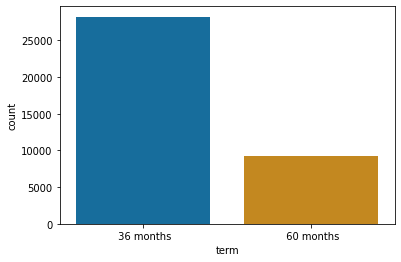

In [400]:
sns.countplot(x='term', data=df)

Column: grade

In [401]:
df.grade.value_counts()

B    11356
A     9659
C     7657
D     4963
E     2609
F      954
G      296
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

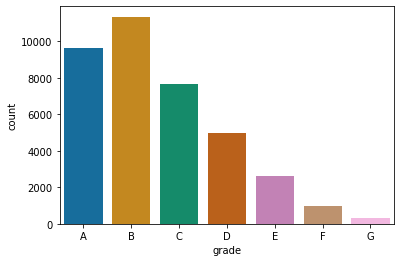

In [402]:
sns.set_palette('colorblind')
sns.countplot(data=df, x="grade", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Column: sub_grade

In [403]:
df.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2386
C1    2012
B2    1944
C2    1895
A3    1740
B1    1721
C3    1456
A2    1441
D2    1252
C4    1175
C5    1119
D3    1086
A1    1052
D1     911
D4     903
D5     811
E1     711
E2     602
E3     501
E4     419
E5     376
F1     300
F2     226
F3     172
F4     146
F5     110
G1      92
G2      76
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

Modifying the subgrade to give an numerical weightage to it.

In [404]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))

<AxesSubplot:xlabel='grade', ylabel='count'>

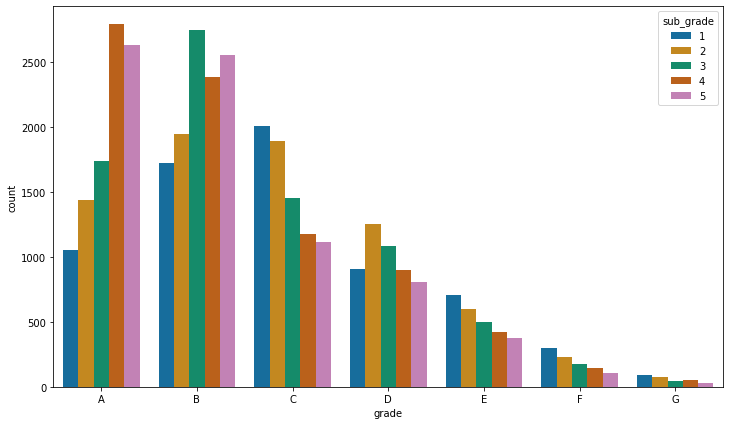

In [405]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', data=df)

Column: emp_length

In [406]:
df.emp_length.value_counts()

10    8487
0     4494
2     4286
3     4008
4     3335
5     3189
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

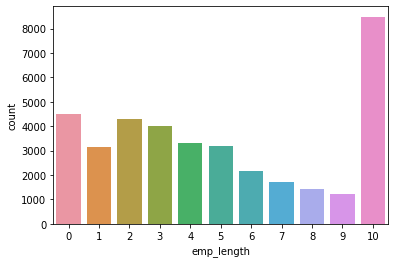

In [407]:
sns.countplot(data=df, x="emp_length")

Columns: home_ownership

In [408]:
df.home_ownership.value_counts()

RENT        18047
MORTGAGE    16586
OWN          2765
OTHER          96
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

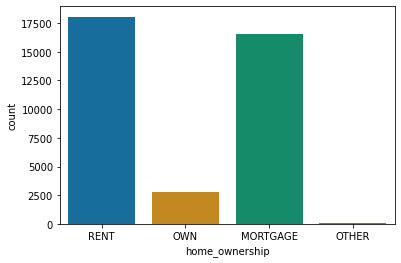

In [409]:
sns.countplot(data=df, x="home_ownership")

Columns: verification_status

In [410]:
df.verification_status.value_counts()

Not Verified       16247
Verified           11764
Source Verified     9483
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

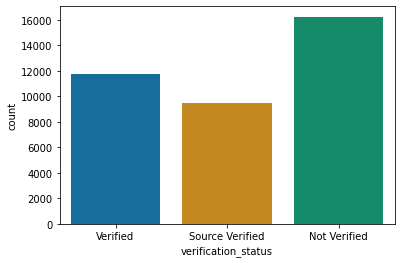

In [411]:
sns.countplot(data=df, x="verification_status")

Column: loan_status

In [412]:
df.loan_status.value_counts()

Fully Paid     32110
Charged Off     5384
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

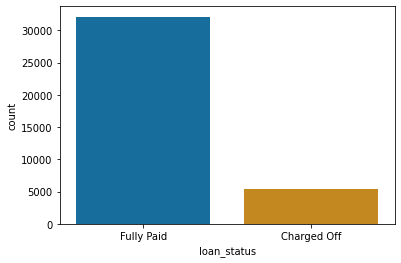

In [413]:
sns.countplot(data=df, x="loan_status")

Columns: purpose

In [414]:
df.purpose.value_counts()

debt_consolidation    17663
credit_card            4897
other                  3698
home_improvement       2782
major_purchase         2074
small_business         1709
car                    1446
wedding                 912
medical                 654
moving                  550
house                   354
vacation                347
educational             314
renewable_energy         94
Name: purpose, dtype: int64

<AxesSubplot:xlabel='count', ylabel='purpose'>

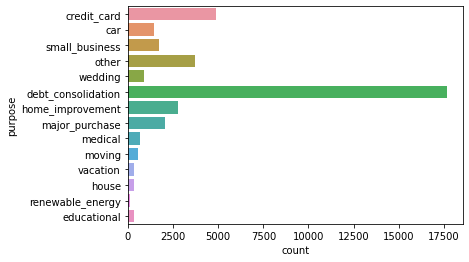

In [415]:
sns.countplot(data=df, y="purpose")

Column: issue_d_month

In [416]:
df.issue_d_month.value_counts()

12    4116
11    3887
10    3632
9     3393
8     3315
7     3248
6     3086
5     2838
4     2754
3     2624
1     2325
2     2276
Name: issue_d_month, dtype: int64

<AxesSubplot:xlabel='issue_d_month', ylabel='count'>

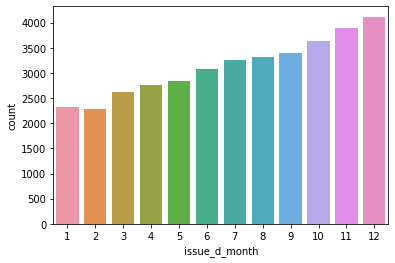

In [417]:
sns.countplot(data=df, x="issue_d_month", order=df.issue_d_month.unique().sort())

Columns: issue_d_year

In [418]:
df.issue_d_year.value_counts()

2011    19794
2010    11196
2009     4702
2008     1553
2007      249
Name: issue_d_year, dtype: int64

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

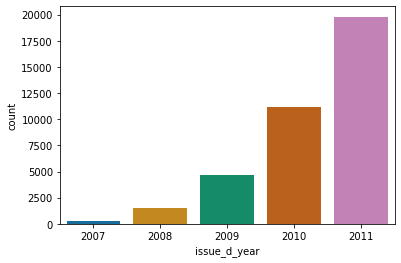

In [419]:
sns.countplot(data=df, x="issue_d_year", order=df.issue_d_year.unique().sort())

Column: earliest_cr_line_d_month

In [420]:
df.earliest_cr_line_d_month.value_counts()

10    3861
12    3830
11    3725
9     3402
1     3252
8     3132
7     2889
6     2777
5     2745
2     2703
3     2609
4     2569
Name: earliest_cr_line_d_month, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_d_month', ylabel='count'>

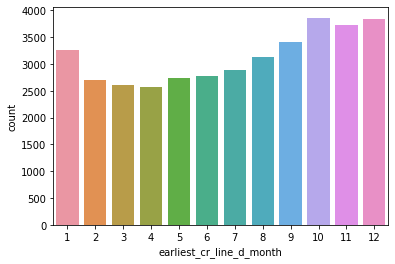

In [421]:
sns.countplot(data=df, x="earliest_cr_line_d_month", order=df.earliest_cr_line_d_month.unique().sort())

Column: earliest_cr_line_d_year

In [422]:
df.earliest_cr_line_d_year.value_counts()

2000    3100
1999    2843
1998    2717
2001    2425
1997    2331
1996    2157
1995    2037
1994    1905
2002    1857
2003    1784
2004    1698
2005    1426
1993    1420
2006    1115
1992    1005
1990     973
1991     918
1989     801
1988     682
2007     677
1987     576
1986     455
1985     420
1984     370
1983     309
1982     199
1981     165
1980     162
2008     144
1979     141
1978     137
1977      99
1976      77
1975      68
1974      53
1973      47
1971      40
1972      38
1970      37
1969      27
2067      15
2068      14
2066       8
2065       6
2063       6
2062       3
2064       3
2056       1
2046       1
2050       1
2054       1
Name: earliest_cr_line_d_year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='earliest_cr_line_d_year'>

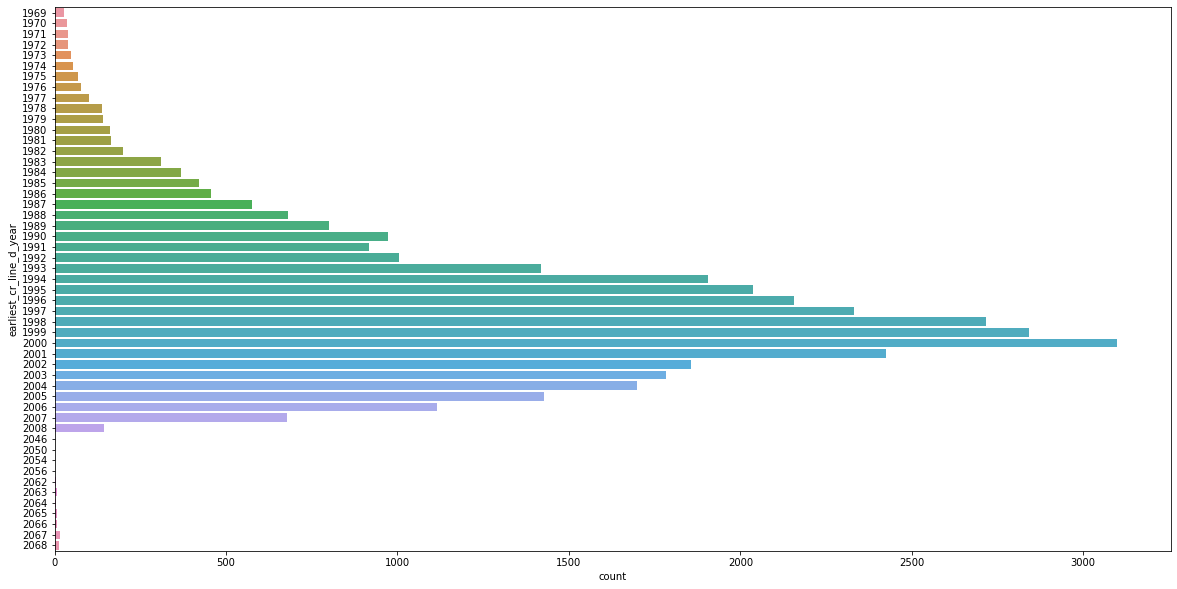

In [423]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data=df,y="earliest_cr_line_d_year", order=df.earliest_cr_line_d_year.unique().sort())

seems like year before 1969, it turned it into 20's like 2068, 2067.

In [424]:
df.earliest_cr_line_d_year = df.earliest_cr_line_d_year.apply(lambda x: x if x <= 2008 else x-100)

<AxesSubplot:xlabel='count', ylabel='earliest_cr_line_d_year'>

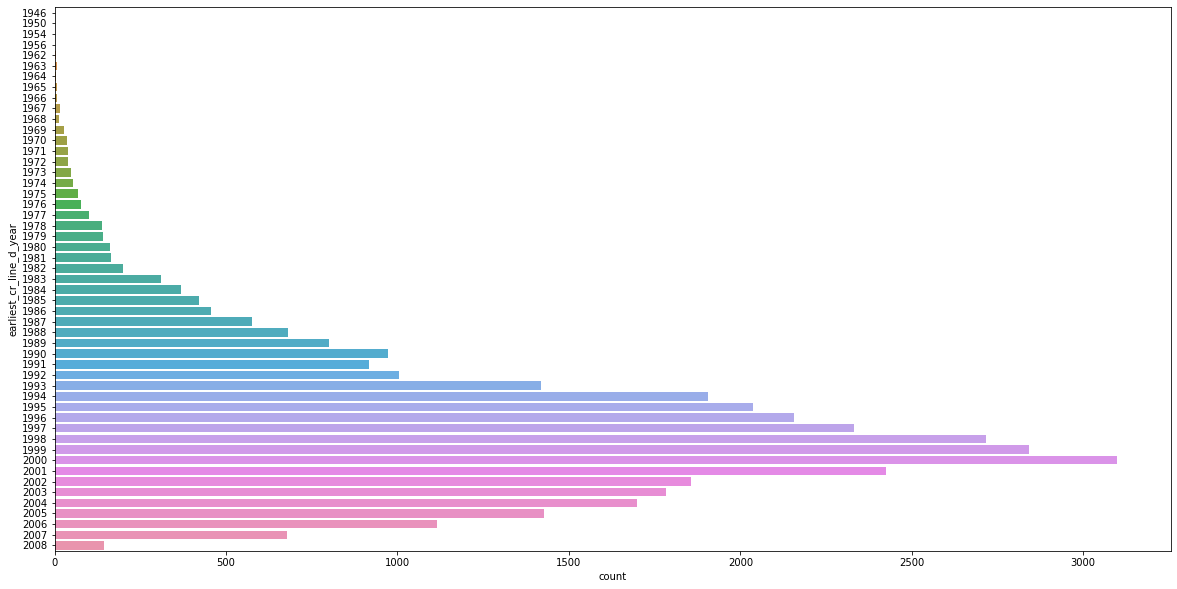

In [425]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data=df,y="earliest_cr_line_d_year", order=df.earliest_cr_line_d_year.unique().sort())

Understanding Continuous Columns

In [426]:
continuous_columns

['loan_amnt',
 'funded_amnt',
 'founded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util',
 'total_acc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec']

In [437]:
def generate_bucket_split(column):
    split = np.array_split(range(int(column.min()), int(column.max())+1), 5)
    bucket_label = []
    for i in split:
        bucket_label.append("{}-{}".format(i[0], i[-1]))
    return bucket_label

Column: loan_amnt

In [428]:
df.loan_amnt.describe()

count    37494.000000
mean     11127.805115
std       7354.046126
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [429]:
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=5, precision=0, labels=generate_bucket_split(df.loan_amnt))


Text(0, 0.5, 'Loan Amount')

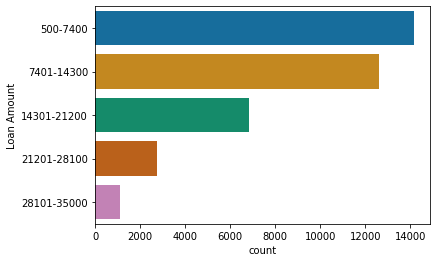

In [430]:
sns.countplot(y='loan_amnt_bucket', data=df)
plt.ylabel('Loan Amount')

Column: funded_amnt

In [431]:
df['funded_amnt_bucket'] = pd.cut(df['funded_amnt'], bins=5, precision=0, labels=generate_bucket_split(df.funded_amnt))


Text(0, 0.5, 'Funded Amount')

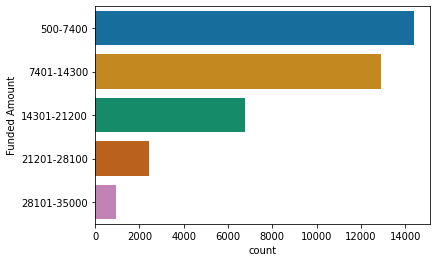

In [432]:
sns.countplot(y='funded_amnt_bucket', data=df)
plt.ylabel('Funded Amount')

After seeing this graph we can see that funded_amnt is similar in distribution, so we decided to drop it.

In [433]:
df.drop(columns=["funded_amnt"], inplace=True, axis=1)

Column: founded_amnt_inv

In [438]:
df['funded_amnt_inv_bucket'] = pd.cut(df['funded_amnt_inv'], bins=5, precision=0, labels=generate_bucket_split(df.funded_amnt_inv))


Text(0, 0.5, 'Funded Amount Investor')

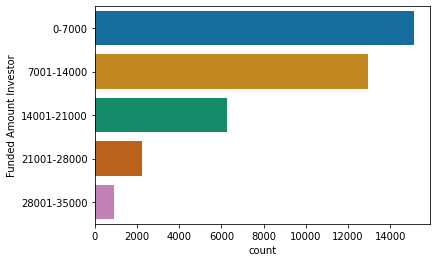

In [439]:
sns.countplot(y='funded_amnt_inv_bucket', data=df)
plt.ylabel('Funded Amount Investor')

Column: int_rate

In [440]:
df.int_rate.describe()

count    37494.000000
mean        11.959033
std          3.682087
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

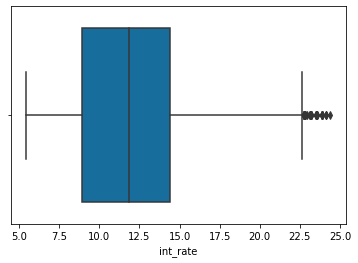

In [442]:
sns.boxplot(data=df, x="int_rate")

This looks normal no need to remove outliers.

In [443]:
df['int_rate_bucket'] = pd.cut(df['int_rate'], bins=5, precision=0, labels=generate_bucket_split(df.int_rate))


Text(0, 0.5, 'Int Rate(%)')

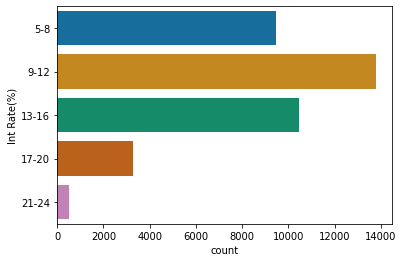

In [445]:
sns.countplot(y='int_rate_bucket', data=df)
plt.ylabel('Int Rate(%)')

Column: installment

In [446]:
df.installment.describe()

count    37494.000000
mean       324.869983
std        208.909158
min         15.690000
25%        167.540000
50%        280.270000
75%        429.395000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:xlabel='installment'>

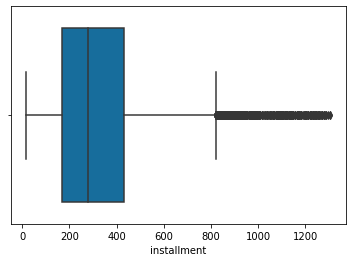

In [448]:
sns.boxplot(data=df, x="installment")

This looks normal no need to remove outliers.

In [449]:
df['installment_bucket'] = pd.cut(df['installment'], bins=5, precision=0, labels=generate_bucket_split(df.installment))


Text(0, 0.5, 'Installment')

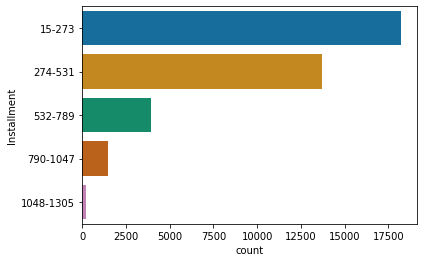

In [450]:
sns.countplot(y='installment_bucket', data=df)
plt.ylabel('Installment')

Column: annual_inc

In [451]:
df.annual_inc.describe()

count    3.749400e+04
mean     6.943562e+04
std      6.467349e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

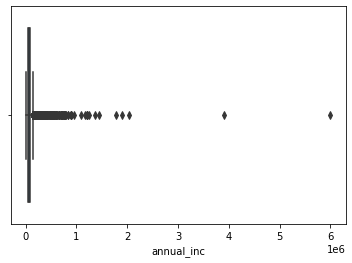

In [452]:
sns.boxplot(data=df, x="annual_inc")

This looks like we need to remove outliers.

In [455]:
df.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.99])

0.50     60000.00
0.75     83000.00
0.90    116700.00
0.95    142000.00
0.97    166312.81
0.99    235000.00
Name: annual_inc, dtype: float64

In [457]:
# Remove more than 95%ile.
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

<AxesSubplot:xlabel='annual_inc'>

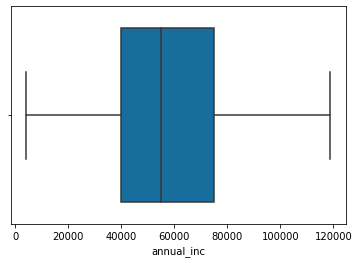

In [458]:
sns.boxplot(data=df, x="annual_inc")

In [459]:
df['annual_inc_bucket'] = pd.cut(df['annual_inc'], bins=5, precision=0, labels=generate_bucket_split(df.annual_inc))


Text(0, 0.5, 'Annal Income (in k)')

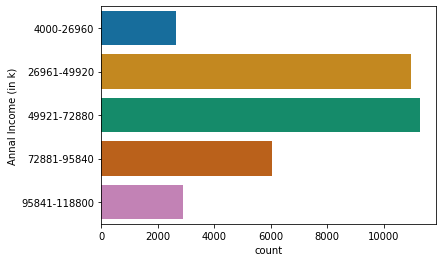

In [460]:
sns.countplot(y='annual_inc_bucket', data=df)
plt.ylabel('Annal Income (in k)')

Column: dti

In [461]:
df.dti.describe()

count    33845.000000
mean        13.555644
std          6.659567
min          0.000000
25%          8.480000
50%         13.730000
75%         18.830000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

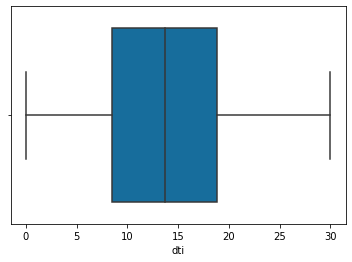

In [462]:
sns.boxplot(data=df, x="dti")

In [463]:
df['dti_bucket'] = pd.cut(df['dti'], bins=5, precision=0, labels=generate_bucket_split(df.dti))


<AxesSubplot:xlabel='count', ylabel='dti_bucket'>

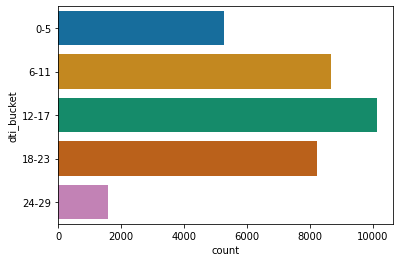

In [464]:
sns.countplot(y='dti_bucket', data=df)

Column: revol_bal

In [468]:
df.revol_bal.describe()

count     33845.000000
mean      11695.966819
std       12527.856489
min           0.000000
25%        3501.000000
50%        8322.000000
75%       15632.000000
max      149000.000000
Name: revol_bal, dtype: float64

Column: revol_util

In [469]:
df.revol_util.describe()

count    33845.000000
mean        48.707706
std         28.185616
min          0.000000
25%         25.500000
50%         49.000000
75%         72.000000
max         99.900000
Name: revol_util, dtype: float64

In [472]:
df['revol_util_bucket'] = pd.cut(df['revol_util'], bins=5, precision=0, labels=generate_bucket_split(df.revol_util))


Text(0, 0.5, 'Revolving line utilization rate')

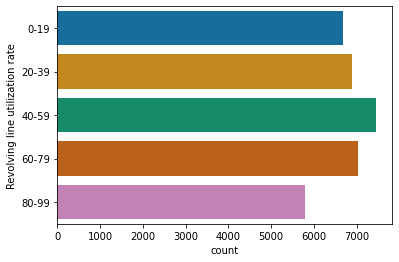

In [474]:
sns.countplot(y='revol_util_bucket', data=df)
plt.ylabel('Revolving line utilization rate')

Column: total_acc

In [475]:
df.total_acc.describe()

count    33845.000000
mean        21.320284
std         11.087097
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         87.000000
Name: total_acc, dtype: float64

/home/siddhant/jupyter/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

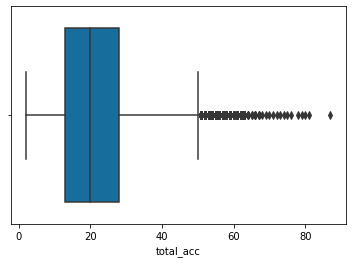

In [476]:
sns.boxplot(df.total_acc)

In [477]:
df['total_acc_bucket'] = pd.cut(df['total_acc'], bins=5, precision=0, labels=generate_bucket_split(df.total_acc))

Text(0, 0.5, 'Total credit line')

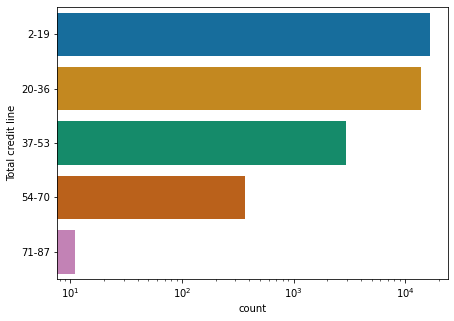

In [495]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_xscale('log')
sns.countplot(y='total_acc_bucket', data=df)
plt.ylabel('Total credit line')

Column: delinq_2yrs

In [479]:
df.delinq_2yrs.describe()

count    33845.000000
mean         0.143094
std          0.486370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [480]:
df.delinq_2yrs.value_counts()

0     30248
1      2767
2       561
3       186
4        49
5        17
6        10
7         4
8         2
11        1
Name: delinq_2yrs, dtype: int64

We can drop delinq_2yrs as more than 95% is 0

In [481]:
df.drop(columns=["delinq_2yrs"], inplace=True, axis=1)

Columns: inq_last_6mths

In [482]:
df.inq_last_6mths.describe()

count    33845.000000
mean         0.861663
std          1.059821
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [483]:
df.inq_last_6mths.value_counts()

0    16493
1     9380
2     4936
3     2575
4      254
5      122
6       45
7       30
8       10
Name: inq_last_6mths, dtype: int64

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

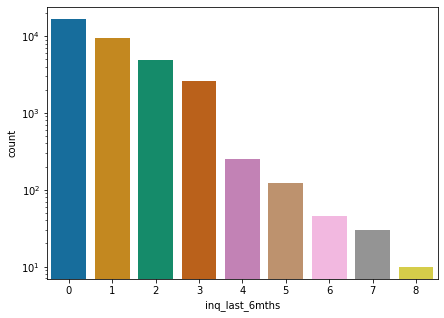

In [494]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=df, order=[0,1,2,3,4,5,6,7,8])

Columns: open_acc

In [485]:
df.open_acc.describe()

count    33845.000000
mean         9.108022
std          4.314123
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

In [486]:
df['open_acc_bucket'] = pd.cut(df['open_acc'], bins=5, precision=0, labels=generate_bucket_split(df.open_acc))

Text(0, 0.5, 'Open Account')

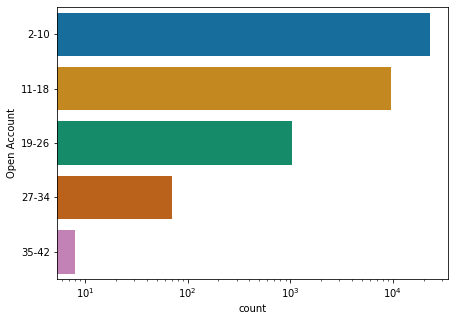

In [493]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_xscale('log')
sns.countplot(y='open_acc_bucket', data=df)
plt.ylabel('Open Account')

Column: pub_rec

In [497]:
df.pub_rec.value_counts()

0    32017
1     1777
2       44
3        5
4        2
Name: pub_rec, dtype: int64

we can drop pub_rec as more than 95% is 0

In [498]:
df.drop(columns=["pub_rec"], inplace=True, axis=1)

### Segmented Univariate Analysis